In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('D:\\Données Météo Australie\WeatherAUS_Clean.csv', sep = ';')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138542 entries, 0 to 138541
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            138542 non-null  object 
 1   Location        138542 non-null  object 
 2   MinTemp         138542 non-null  float64
 3   MaxTemp         138542 non-null  float64
 4   Rainfall        138542 non-null  float64
 5   Evaporation     138542 non-null  float64
 6   Sunshine        138542 non-null  float64
 7   WindGustDir     128732 non-null  object 
 8   WindGustSpeed   138542 non-null  float64
 9   Humidity9am     138542 non-null  float64
 10  Humidity3pm     138542 non-null  float64
 11  Pressure9am     138542 non-null  float64
 12  Pressure3pm     138542 non-null  float64
 13  RainToday       135336 non-null  object 
 14  RainTomorrow    135330 non-null  object 
 15  year            138542 non-null  int64  
 16  month           138542 non-null  int64  
 17  day       

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,year,month,day,week,WindGustDirStr
0,2009-01-01,Albury,11.3,26.5,0.0,9.8,12.9,WNW,56.0,46.0,26.0,1004.5,1003.2,No,No,2009,1,1,1,WNW
1,2009-01-02,Albury,9.6,23.9,0.0,11.0,5.9,W,41.0,44.0,22.0,1014.4,1013.1,No,No,2009,1,2,1,W
2,2009-01-03,Albury,10.5,28.8,0.0,9.0,0.5,SSE,26.0,43.0,22.0,1018.7,1014.8,No,No,2009,1,3,1,SSE
3,2009-01-04,Albury,12.3,34.6,0.0,5.4,11.3,WNW,37.0,41.0,12.0,1015.1,1010.3,No,No,2009,1,4,1,WNW
4,2009-01-05,Albury,12.9,35.8,0.0,10.0,12.2,WNW,41.0,41.0,9.0,1012.6,1009.2,No,No,2009,1,5,2,WNW


In [6]:
df.isna().sum().sum()

26038

In [7]:
df['RainToday'].isna().sum()

3206

In [8]:
df['RainTomorrow'].isna().sum()

3212

In [9]:
df.dropna(subset = ['RainToday','RainTomorrow'] , how = 'any', axis = 0, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133963 entries, 0 to 138540
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            133963 non-null  object 
 1   Location        133963 non-null  object 
 2   MinTemp         133963 non-null  float64
 3   MaxTemp         133963 non-null  float64
 4   Rainfall        133963 non-null  float64
 5   Evaporation     133963 non-null  float64
 6   Sunshine        133963 non-null  float64
 7   WindGustDir     125303 non-null  object 
 8   WindGustSpeed   133963 non-null  float64
 9   Humidity9am     133963 non-null  float64
 10  Humidity3pm     133963 non-null  float64
 11  Pressure9am     133963 non-null  float64
 12  Pressure3pm     133963 non-null  float64
 13  RainToday       133963 non-null  object 
 14  RainTomorrow    133963 non-null  object 
 15  year            133963 non-null  int64  
 16  month           133963 non-null  int64  
 17  day       

In [10]:
df['RainTomorrow'].isna().sum()

0

In [ ]:
# Nous allons étudier les relations et les influences possibles des différentes variables explicatives du dataset, sur 
# la variable cible considérée : RainTomorrow.
#Pour cela, nous effectuerons des tests chi2 entre les variables que nous considèrerons comme catégorielles et la variable cible
#puis des tests ANOVA entre les variables explicatives numériques continues et la variable cible RainTomorrow.

In [11]:
# Etudions si la Direction du vent a une incidence sur la pluviosité du lendemain
# Etudions la contingence entre les deux variables WindGustDir et RainTomorrow
table_contingence = pd.crosstab(df['WindGustDir'], df['RainTomorrow'])
table_contingence

RainTomorrow,No,Yes
WindGustDir,,
E,7201,1273
ENE,6407,1222
ESE,5691,1130
N,6245,2260
NE,5589,1257
NNE,4811,1408
NNW,3865,1547
NW,4888,2047
S,6710,1912


In [12]:
# Pour cela, effectuons un test de chi2 pour cette table de contingence.
# L'Hypothèse H0 est donc: WindGustDir et RainTomorrow sont indépendantes.
from scipy.stats import chi2_contingency
resultat_chi2 = chi2_contingency(table_contingence)
print(resultat_chi2)
statistique = resultat_chi2[0]
p_value = resultat_chi2[1]
degre = resultat_chi2[2]
print('Statistique du test chi2:', statistique)
print('p_value du test chi2:', p_value)
print('Degré de liberté du test chi2:', degre)

(1451.9177759789013, 1.1162380559753806e-300, 15, array([[6615.71590465, 1858.28409535],
       [5956.01801234, 1672.98198766],
       [5325.20629993, 1495.79370007],
       [6639.91783916, 1865.08216084],
       [5344.72398905, 1501.27601095],
       [4855.22034588, 1363.77965412],
       [4225.18934104, 1186.81065896],
       [5414.20696232, 1520.79303768],
       [6731.26062425, 1890.73937575],
       [6906.91982634, 1940.08017366],
       [6603.22458361, 1854.77541639],
       [6546.23293137, 1838.76706863],
       [6650.84774507, 1868.15225493],
       [7376.12507282, 2071.87492718],
       [5927.91254   , 1665.08746   ],
       [6706.27798217, 1883.72201783]]))
Statistique du test chi2: 1451.9177759789013
p_value du test chi2: 1.1162380559753806e-300
Degré de liberté du test chi2: 15


In [13]:
# La p_value étant bien inférieure à 5%, on rejette l'Hypothèse H0 qui dit que les 2 variables sont indépendantes.
# Pour calculer le niveau de corrélation entre les 2 variables WindGustDir et RainTomorrow, on calcule le V de Cramer
# Définissons la fonction V_Cramer

def V_Cramer (table_contingence, N):
#r étant le nombre de colonnes de la table de contingence
    r = table_contingence.shape[1]
    r_tilde = table_contingence.shape[1]-((table_contingence.shape[1]-1)**2/(N-1))
                                          
#l étant le nombre de lignes de la table de contingence
    k = table_contingence.shape[0]
    k_tilde = table_contingence.shape[0]-((table_contingence.shape[0]-1)**2/(N-1))

    Phi2 = max(0,(statistique/N)-((k-1)*(r-1)/(N-1)))

    V = np.sqrt(Phi2/(min(k_tilde-1,r_tilde-1)))

    return V

V_Cramer(table_contingence,df.shape[0])

0.10356789048117582

In [ ]:
# Le V_cramer n'est pas très élevé (pas très proche de 1), on en déduit qu'il n'y a pas une forte corrélation entre ces 
# 2 variables.

In [14]:
# Etudions si la Vitesse du vent a une incidence sur la pluviosité du lendemain
df['WindGustSpeed'].value_counts()
# La variable WindGustSpeed possède uniquement 66 valeurs sur les 138 542 entrées, donc elle peut être consudérée comme une 
# variable catégorielle
# Nous allons donc effectuer le même test de chi_2 sur la table de contingence de WindGustSpeed et de RainTomorrow que 
# précédemment

35.0     9067
39.0     8666
31.0     8345
37.0     8016
33.0     7866
         ... 
135.0       2
126.0       2
122.0       2
124.0       2
130.0       1
Name: WindGustSpeed, Length: 66, dtype: int64

In [15]:
#Etudions la contingence entre les deux variables WindGustSpeed et RainTomorrow
table_contingence = pd.crosstab(df['WindGustSpeed'], df['RainTomorrow'])
table_contingence

RainTomorrow,No,Yes
WindGustSpeed,,
7.0,5,3
9.0,44,5
11.0,127,23
13.0,390,71
15.0,688,106
...,...,...
122.0,1,1
124.0,1,1
126.0,1,1


In [16]:
# Effectuons un test de chi2 pour cette table de contingence.
# L'Hypothèse H0 est donc: WindGustSpeed et RainTomorrow sont indépendantes.

resultat_chi2 = chi2_contingency(table_contingence)
print(resultat_chi2)
statistique = resultat_chi2[0]
p_value = resultat_chi2[1]
degre = resultat_chi2[2]
print('Statistique du test chi2:', statistique)
print('p_value du test chi2:', p_value)
print('Degré de liberté du test chi2:', degre)

(7775.34464917488, 0.0, 65, array([[6.22380807e+00, 1.77619193e+00],
       [3.81208244e+01, 1.08791756e+01],
       [1.16696401e+02, 3.33035988e+01],
       [3.58646940e+02, 1.02353060e+02],
       [6.17712951e+02, 1.76287049e+02],
       [1.03393012e+03, 2.95069885e+02],
       [1.32878302e+03, 3.79216978e+02],
       [2.02662750e+03, 5.78372498e+02],
       [2.19467032e+03, 6.26329681e+02],
       [3.26672126e+03, 9.32278741e+02],
       [3.76306995e+03, 1.07393005e+03],
       [5.02650299e+03, 1.43449701e+03],
       [5.37036839e+03, 1.53263161e+03],
       [6.49220979e+03, 1.85279021e+03],
       [6.11955928e+03, 1.74644072e+03],
       [7.05390847e+03, 2.01309153e+03],
       [6.23625568e+03, 1.77974432e+03],
       [6.74194009e+03, 1.92405991e+03],
       [5.64499392e+03, 1.61100608e+03],
       [5.08407321e+03, 1.45092679e+03],
       [4.14739010e+03, 1.18360990e+03],
       [4.07114845e+03, 1.16185155e+03],
       [3.90077171e+03, 1.11322829e+03],
       [3.80663661e+03, 1.086

In [17]:
# La p_value étant bien inférieure à 5%, on rejette l'Hypothèse H0 qui dit que les 2 variables sont indépendantes.
# Pour calculer le niveau de corrélation entre les 2 variables WindGustSpeed et RainTomorrow, on calcule le V de Cramer

V_Cramer(table_contingence,df.shape[0])

0.23990874042507135

In [ ]:
#En conclusion, Le V_cramer n'est pas très élevé (pas très proche de 1), on en déduit qu'il n'y a pas une forte corrélation 
# entre les 2 variables WindGustSpeed et RainTomorrow, mais toutefois cette corrélation n'est pas négligeable

In [18]:
# Etudions si l'Humidité à 3 heures de l'après-midi a une incidence sur la pluviosité du lendemain
df['Humidity3pm'].value_counts()
# La variable Humidity3pm possède uniquement 101 valeurs sur les 138 542 entrées, donc elle peut être consudérée comme une 
# variable catégorielle.
# Nous allons donc effectuer le même test de chi_2 sur la table de contingence de Humidity3pm et de RainTomorrow que  
#précédemment

52.0    2622
57.0    2620
55.0    2577
53.0    2576
59.0    2574
        ... 
4.0      113
3.0       63
2.0       35
1.0       26
0.0        4
Name: Humidity3pm, Length: 101, dtype: int64

In [19]:
#Etudions la contingence entre les deux variables Humidity3pm et RainTomorrow
table_contingence = pd.crosstab(df['Humidity3pm'], df['RainTomorrow'])
table_contingence

RainTomorrow,No,Yes
Humidity3pm,,
0.0,4,0
1.0,24,2
2.0,35,0
3.0,62,1
4.0,111,2
...,...,...
96.0,45,391
97.0,77,306
98.0,113,456


In [20]:
# Effectuons un test de chi2 pour cette table de contingence.
# L'Hypothèse H0 est donc: Humidity3pm et RainTomorrow sont indépendantes.

resultat_chi2 = chi2_contingency(table_contingence)
print(resultat_chi2)
statistique = resultat_chi2[0]
p_value = resultat_chi2[1]
degre = resultat_chi2[2]
print('Statistique du test chi2:', statistique)
print('p_value du test chi2:', p_value)
print('Degré de liberté du test chi2:', degre)

(34067.9934271072, 0.0, 100, array([[3.11190403e+00, 8.88095967e-01],
       [2.02273762e+01, 5.77262378e+00],
       [2.72291603e+01, 7.77083971e+00],
       [4.90124885e+01, 1.39875115e+01],
       [8.79112889e+01, 2.50887111e+01],
       [1.18252353e+02, 3.37476467e+01],
       [1.85936266e+02, 5.30637340e+01],
       [2.34948755e+02, 6.70512455e+01],
       [3.23638019e+02, 9.23619805e+01],
       [3.69538604e+02, 1.05461396e+02],
       [4.49670133e+02, 1.28329867e+02],
       [4.36444541e+02, 1.24555459e+02],
       [5.67144510e+02, 1.61855490e+02],
       [5.60142726e+02, 1.59857274e+02],
       [5.82704030e+02, 1.66295970e+02],
       [6.47276039e+02, 1.84723961e+02],
       [6.56611751e+02, 1.87388249e+02],
       [7.10292096e+02, 2.02707904e+02],
       [6.81506983e+02, 1.94493017e+02],
       [7.77976008e+02, 2.22023992e+02],
       [7.92757552e+02, 2.26242448e+02],
       [8.26988497e+02, 2.36011503e+02],
       [8.82224793e+02, 2.51775207e+02],
       [9.51464658e+02, 2.71

In [21]:
# La p_value étant bien inférieure à 5%, on rejette l'Hypothèse H0 qui dit que les 2 variables sont indépendantes.
# Pour calculer le niveau de corrélation entre les 2 variables Humidity3pm et RainTomorrow, on calcule le V de Cramer

V_Cramer(table_contingence,df.shape[0])

0.5035517739266204

In [ ]:
#En conclusion, Le V_cramer montre qu'il y a une  corrélation moyenne
# entre les 2 variables Humidity3pm et RainTomorrow.

In [22]:
df['Sunshine'].value_counts()
# Nous pouvons considérer Sunshine comme une varable catégorielle
# La variable Sunshine possède uniquement 146 valeurs sur les 138 542 entrées, donc elle peut être consudérée comme une 
# variable catégorielle.
# Nous allons donc effectuer le même test de chi_2 sur la table de contingence de Humidity3pm et de RainTomorrow que  
#précédemment

0.000000     5626
10.700000    2319
9.300000     2234
10.800000    1951
10.900000    1935
             ... 
14.100000       7
14.300000       5
14.200000       2
7.644828        2
14.500000       1
Name: Sunshine, Length: 146, dtype: int64

In [23]:
# Etudions si le Sunshine de la journée a une incidence sur la pluviosité du lendemain
# Etudions la contingence entre les deux variables Sunshine et RainTomorrow
table_contingence = pd.crosstab(df['Sunshine'], df['RainTomorrow'])
table_contingence

RainTomorrow,No,Yes
Sunshine,,
0.0,2394,3232
0.1,362,492
0.2,502,564
0.3,439,359
0.4,333,277
...,...,...
14.0,15,0
14.1,7,0
14.2,2,0


In [24]:
# Effectuons un test de chi2 pour cette table de contingence.
# L'Hypothèse H0 est donc: Sunshine et RainTomorrow sont indépendantes.

resultat_chi2 = chi2_contingency(table_contingence)
print(resultat_chi2)
statistique = resultat_chi2[0]
p_value = resultat_chi2[1]
degre = resultat_chi2[2]
print('Statistique du test chi2:', statistique)
print('p_value du test chi2:', p_value)
print('Degré de liberté du test chi2:', degre)

(20344.11548641271, 0.0, 145, array([[4.37689302e+03, 1.24910698e+03],
       [6.64391511e+02, 1.89608489e+02],
       [8.29322425e+02, 2.36677575e+02],
       [6.20824855e+02, 1.77175145e+02],
       [4.74565365e+02, 1.35434635e+02],
       [4.80789173e+02, 1.37210827e+02],
       [3.92099908e+02, 1.11900092e+02],
       [5.08018333e+02, 1.44981667e+02],
       [4.23218949e+02, 1.20781051e+02],
       [4.30998709e+02, 1.23001291e+02],
       [4.34110613e+02, 1.23889387e+02],
       [3.52423132e+02, 1.00576868e+02],
       [4.62895725e+02, 1.32104275e+02],
       [4.08437404e+02, 1.16562596e+02],
       [4.20107044e+02, 1.19892956e+02],
       [3.99101692e+02, 1.13898308e+02],
       [3.73428484e+02, 1.06571516e+02],
       [3.87432052e+02, 1.10567948e+02],
       [4.23218949e+02, 1.20781051e+02],
       [3.95211812e+02, 1.12788188e+02],
       [3.74206460e+02, 1.06793540e+02],
       [3.99879668e+02, 1.14120332e+02],
       [4.51226085e+02, 1.28773915e+02],
       [4.93236789e+02, 1.4

In [25]:
# La p_value étant bien inférieure à 5%, on rejette l'Hypothèse H0 qui dit que les 2 variables sont indépendantes.
# Pour calculer le niveau de corrélation entre les 2 variables Sunshine et RainTomorrow, on calcule le V de Cramer

V_Cramer(table_contingence,df.shape[0])

0.38830711934407386

In [ ]:
#En conclusion, Le V_cramer montre qu'il y a une  corrélation moyenne
# entre les 2 variables Sunshine et RainTomorrow.

In [26]:
# Etudions la corrélation entre les 2 variables RainToday et RainTomorrow
table_contingence = pd.crosstab(df['RainToday'], df['RainTomorrow'])
table_contingence

RainTomorrow,No,Yes
RainToday,,
No,88198,15786
Yes,16022,13957


In [27]:
# Effectuons un test de chi2 pour cette table de contingence.
# L'Hypothèse H0 est donc: RainToday et RainTomorrow sont indépendantes.

resultat_chi2 = chi2_contingency(table_contingence)
print(resultat_chi2)
statistique = resultat_chi2[0]
p_value = resultat_chi2[1]
degre = resultat_chi2[2]
print('Statistique du test chi2:', statistique)
print('p_value du test chi2:', p_value)
print('Degré de liberté du test chi2:', degre)

(13259.693696399969, 0.0, 1, array([[80897.05724715, 23086.94275285],
       [23322.94275285,  6656.05724715]]))
Statistique du test chi2: 13259.693696399969
p_value du test chi2: 0.0
Degré de liberté du test chi2: 1


In [28]:
# La p_value étant bien inférieure à 5%, on rejette l'Hypothèse H0 qui dit que les 2 variables sont indépendantes.
# Pour calculer le niveau de corrélation entre les 2 variables RainToday et RainTomorrow, on calcule le V de Cramer

V_Cramer(table_contingence,df.shape[0])

0.3146006077871503

In [ ]:
#En conclusion, Le V_cramer montre qu'il y a une corrélation moyenne non négligeable entre les 2 variables RainToday & RainTomorrow.

In [29]:
# Sur les 4 variables MinTemp, MaxTemp Evaporation et Pressure3pm, qui contiennent plus de 350 valeurs chacune, nous allons 
# effectuer des tests ANOVA (les considérant comme des variables numériques continues), pour étudier la relation entre ces
# variables et notre variable cible RainTomorrow
df['Pressure3pm'].value_counts()

1015.6    840
1015.5    824
1015.3    810
1015.1    807
1016.0    806
         ... 
985.1       1
985.3       1
981.2       1
988.4       1
983.3       1
Name: Pressure3pm, Length: 538, dtype: int64

In [30]:
df['MinTemp'].value_counts()

 9.6     846
 10.2    830
 10.5    826
 12.0    824
 11.0    821
        ... 
-7.8       1
-7.2       1
-7.1       1
-8.5       1
 30.2      1
Name: MinTemp, Length: 389, dtype: int64

In [31]:
df['MaxTemp'].value_counts()

 20.0    820
 19.0    793
 19.8    782
 20.4    767
 20.8    764
        ... 
-3.2       1
 46.6      1
-4.1       1
 0.7       1
-3.8       1
Name: MaxTemp, Length: 503, dtype: int64

In [32]:
df['Evaporation'].value_counts()

4.0     5656
8.0     4185
3.4     3500
2.2     3404
3.2     3396
        ... 
22.1       1
44.4       1
41.2       1
35.6       1
39.6       1
Name: Evaporation, Length: 357, dtype: int64

In [33]:
# ******************************Tests ANOVA ******************************
# Relation entre Pressure3pm et RainTomorrow
#-------------------------------------------
import statsmodels.api

result = statsmodels.formula.api.ols('Pressure3pm~RainTomorrow', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
RainTomorrow,1.0,3.119523e+05,311952.267224,6765.665458,0.0
Residual,133961.0,6.176693e+06,46.108143,NaN,NaN


In [ ]:
# Du fait que la p_value (PR>F) est <5%, on rejette l'hypothèse H0 qui dit que les 2 variables Pressure3pm et RainTomorrow
# sont indépendantes et on déduit du test que Pressure3pm a un effet statistique significatif sur la variable cible.

In [34]:
# Relation entre MinTemp et RainTomorrow
#---------------------------------------
result = statsmodels.formula.api.ols('MinTemp~RainTomorrow', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
RainTomorrow,1.0,3.915520e+04,39155.203049,979.732701,2.725632e-214
Residual,133961.0,5.353777e+06,39.965189,NaN,NaN


In [ ]:
# Du fait que la p_value (PR>F) est <5%, on rejette l'hypothèse H0 qui dit que les 2 variables MinTemp et RainTomorrow
# sont indépendantes et on déduit du test que MinTemp a un effet statistique significatif sur la variable cible.

In [35]:
# Relation entre MaxTemp et RainTomorrow
#---------------------------------------
result = statsmodels.formula.api.ols('MaxTemp~RainTomorrow', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
RainTomorrow,1.0,1.744683e+05,174468.296027,3600.346093,0.0
Residual,133961.0,6.491584e+06,48.458757,NaN,NaN


In [ ]:
# Du fait que la p_value (PR>F) est <5%, on rejette l'hypothèse H0 qui dit que les 2 variables MaxTemp et RainTomorrow
# sont indépendantes et on déduit du test que MaxTemp a un effet statistique significatif sur la variable cible.

In [36]:
# Relation entre Evaporation et RainTomorrow
#---------------------------------------
result = statsmodels.formula.api.ols('Evaporation~RainTomorrow', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
RainTomorrow,1.0,2.520965e+04,25209.651242,1787.043165,0.0
Residual,133961.0,1.889775e+06,14.106907,NaN,NaN


In [ ]:
# Du fait que la p_value (PR>F) est <5%, on rejette l'hypothèse H0 qui dit que les 2 variables Evaporation et RainTomorrow
# sont indépendantes et on déduit du test que Evaporation a un effet statistique significatif sur la variable cible.

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
#              Application d'un modèle de régression logistqiue simple pour prédire la variable cible RainTomorrow
#-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#Pour cela, il faut apporter encore quelques modifications au fichier de base:
# 1) Remplacer les Yes, No des variables RainToday et RainTomorrow par 1 et 0 respectivement
# 2) remplacer la variable WindGustDir par des variables indicatrices et supprimer la colonne WindGustDirStr
# 3 appliquer une standardisation des variables numériques

In [37]:
df['RainToday'] = df['RainToday'].replace (to_replace = ['Yes','No'], value = [1,0])
df['RainTomorrow'] = df['RainTomorrow'].replace (to_replace = ['Yes','No'], value = [1,0])
df.head(20)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,year,month,day,week,WindGustDirStr
0,2009-01-01,Albury,11.3,26.5,0.0,9.8,12.9,WNW,56.0,46.0,26.0,1004.5,1003.2,0,0,2009,1,1,1,WNW
1,2009-01-02,Albury,9.6,23.9,0.0,11.0,5.9,W,41.0,44.0,22.0,1014.4,1013.1,0,0,2009,1,2,1,W
2,2009-01-03,Albury,10.5,28.8,0.0,9.0,0.5,SSE,26.0,43.0,22.0,1018.7,1014.8,0,0,2009,1,3,1,SSE
3,2009-01-04,Albury,12.3,34.6,0.0,5.4,11.3,WNW,37.0,41.0,12.0,1015.1,1010.3,0,0,2009,1,4,1,WNW
4,2009-01-05,Albury,12.9,35.8,0.0,10.0,12.2,WNW,41.0,41.0,9.0,1012.6,1009.2,0,0,2009,1,5,2,WNW
5,2009-01-06,Albury,13.7,37.9,0.0,10.0,11.8,W,52.0,33.0,8.0,1010.9,1006.7,0,0,2009,1,6,2,W
6,2009-01-07,Albury,16.1,38.9,0.0,9.0,9.3,W,57.0,34.0,12.0,1007.0,1002.7,0,0,2009,1,7,2,W
7,2009-01-08,Albury,14.0,28.3,0.0,9.8,0.0,W,48.0,43.0,15.0,1011.9,1010.9,0,0,2009,1,8,2,W
8,2009-01-09,Albury,12.5,28.4,0.0,7.6,5.9,NE,37.0,38.0,16.0,1017.8,1013.7,0,0,2009,1,9,2,NE
9,2009-01-10,Albury,17.0,30.8,0.0,7.6,6.1,NE,37.0,36.0,24.0,1013.4,1008.1,0,0,2009,1,10,2,NE


In [38]:
df = df.drop('WindGustDirStr', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133963 entries, 0 to 138540
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           133963 non-null  object 
 1   Location       133963 non-null  object 
 2   MinTemp        133963 non-null  float64
 3   MaxTemp        133963 non-null  float64
 4   Rainfall       133963 non-null  float64
 5   Evaporation    133963 non-null  float64
 6   Sunshine       133963 non-null  float64
 7   WindGustDir    125303 non-null  object 
 8   WindGustSpeed  133963 non-null  float64
 9   Humidity9am    133963 non-null  float64
 10  Humidity3pm    133963 non-null  float64
 11  Pressure9am    133963 non-null  float64
 12  Pressure3pm    133963 non-null  float64
 13  RainToday      133963 non-null  int64  
 14  RainTomorrow   133963 non-null  int64  
 15  year           133963 non-null  int64  
 16  month          133963 non-null  int64  
 17  day            133963 non-nul

In [39]:
# Remplacement de la variable "WindGustDir" par des variables indicatrices
dummies = pd.get_dummies(df['WindGustDir'])
df = pd.concat([df,dummies], axis = 1)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Humidity9am,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,2009-01-01,Albury,11.3,26.5,0.0,9.8,12.9,WNW,56.0,46.0,...,0,0,0,0,0,0,0,0,1,0
1,2009-01-02,Albury,9.6,23.9,0.0,11.0,5.9,W,41.0,44.0,...,0,0,0,0,0,0,0,1,0,0
2,2009-01-03,Albury,10.5,28.8,0.0,9.0,0.5,SSE,26.0,43.0,...,0,0,0,0,1,0,0,0,0,0
3,2009-01-04,Albury,12.3,34.6,0.0,5.4,11.3,WNW,37.0,41.0,...,0,0,0,0,0,0,0,0,1,0
4,2009-01-05,Albury,12.9,35.8,0.0,10.0,12.2,WNW,41.0,41.0,...,0,0,0,0,0,0,0,0,1,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133963 entries, 0 to 138540
Data columns (total 35 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           133963 non-null  object 
 1   Location       133963 non-null  object 
 2   MinTemp        133963 non-null  float64
 3   MaxTemp        133963 non-null  float64
 4   Rainfall       133963 non-null  float64
 5   Evaporation    133963 non-null  float64
 6   Sunshine       133963 non-null  float64
 7   WindGustDir    125303 non-null  object 
 8   WindGustSpeed  133963 non-null  float64
 9   Humidity9am    133963 non-null  float64
 10  Humidity3pm    133963 non-null  float64
 11  Pressure9am    133963 non-null  float64
 12  Pressure3pm    133963 non-null  float64
 13  RainToday      133963 non-null  int64  
 14  RainTomorrow   133963 non-null  int64  
 15  year           133963 non-null  int64  
 16  month          133963 non-null  int64  
 17  day            133963 non-nul

In [41]:
# Remplacement de la variable "Location" par des variables indicatrices
dummies2 = pd.get_dummies(df['Location'], prefix = 'Location')
df = pd.concat([df,dummies2], axis = 1)

In [42]:
df = df.drop('WindGustDir', axis = 1)
df = df.drop('Location', axis = 1)

In [43]:
df = df.drop('Date', axis = 1)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133963 entries, 0 to 138540
Data columns (total 79 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   MinTemp                    133963 non-null  float64
 1   MaxTemp                    133963 non-null  float64
 2   Rainfall                   133963 non-null  float64
 3   Evaporation                133963 non-null  float64
 4   Sunshine                   133963 non-null  float64
 5   WindGustSpeed              133963 non-null  float64
 6   Humidity9am                133963 non-null  float64
 7   Humidity3pm                133963 non-null  float64
 8   Pressure9am                133963 non-null  float64
 9   Pressure3pm                133963 non-null  float64
 10  RainToday                  133963 non-null  int64  
 11  RainTomorrow               133963 non-null  int64  
 12  year                       133963 non-null  int64  
 13  month                      13

In [45]:
# Standardisation des variables numériques:
df_std = df
num_var = df_std.select_dtypes(include = 'float64')
num = num_var.columns
# on ne prend pas les 'int64', car ces variables correspondent à year, month, day
#Standardisation:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std[num] = scaler.fit_transform(df_std[num])
df_std.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,-0.140020,0.467500,-0.2762,1.176539,1.405235,1.164320,-1.186246,-1.219834,-1.892587,-1.758021,...,0,0,0,0,0,0,0,0,0,0
1,-0.407954,0.098920,-0.2762,1.493928,-0.425009,0.062958,-1.290762,-1.411670,-0.485584,-0.335526,...,0,0,0,0,0,0,0,0,0,0
2,-0.266107,0.793551,-0.2762,0.964947,-1.836911,-1.038404,-1.343020,-1.411670,0.125539,-0.091260,...,0,0,0,0,0,0,0,0,0,0
3,0.017589,1.615768,-0.2762,0.012782,0.986894,-0.230739,-1.447535,-1.891261,-0.386099,-0.737848,...,0,0,0,0,0,0,0,0,0,0
4,0.112154,1.785881,-0.2762,1.229437,1.222211,0.062958,-1.447535,-2.035138,-0.741403,-0.895903,...,0,0,0,0,0,0,0,0,0,0


In [46]:
target = df_std['RainTomorrow']
data = df_std.drop('RainTomorrow', axis = 1)


In [47]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 66)

In [48]:
X_train.isnull().sum().sum()
y_train.isna().sum().sum()
#X_train = X_train.fillna('ffill', axis = 1)
#X_train = X_train.replace('ffill', np.nan)
#X_train = X_train.fillna( method = 'ffill', axis = 1)
#X_train.isnull().sum().sum()

0

In [48]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 0.1)
lr.fit(X_train, y_train)

C:\Users\zeina\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [49]:
y_pred = lr.predict(X_test)
pd.crosstab(y_test, y_pred, rownames = ['Classe Réelle'], colnames = ['Classe Prédite'])

Classe Prédite,0,1
Classe Réelle,,
0,19807,1113
1,2932,2941


In [50]:
lr.score(X_test,y_test)

0.849027731123801

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     20920
           1       0.73      0.50      0.59      5873

    accuracy                           0.85     26793
   macro avg       0.80      0.72      0.75     26793
weighted avg       0.84      0.85      0.84     26793



In [ ]:
# Le modèle performe plutôt bien quand il s'agit de prédire qu'il ne pleut pas, mais beaucoup moins bien quand il s'agit de 
# prédire qu'il va pleuvoir le lendemain.
# Il est vrai que le jeu de données est déséquilibré. Dans le dataset initial,il y a 22% de "1" (positif) pour la variable cible
# "RainTomorrow".
# Essayons de voir la moyenne géométrique de ce classifieur naïf, qui peut s'avérer utile, dans les problèmes de classification
# déséquilibrée.

In [52]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.87      0.95      0.50      0.91      0.69      0.50     20920
          1       0.73      0.50      0.95      0.59      0.69      0.45      5873

avg / total       0.84      0.85      0.60      0.84      0.69      0.49     26793



In [ ]:
# Essayer de faire un OverSampling pour rééquilibrer les données, puis d'appliquer à nouveau Logistic Regression et pourquoi pas
# KNNeighbors

In [49]:
from imblearn.over_sampling import RandomOverSampler
rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(X_train, y_train)

print('Classes échantillon oversampled :', dict(pd.Series(y_ro).value_counts()))

Classes échantillon oversampled : {0: 83300, 1: 83300}


In [ ]:
#****************************************************************************************************************************
#                                Choix des Hyperparamètres de la Logistic Regression
#**************************************************************************************************************************** 

#lr = LogisticRegression(max_iter = 1000) 

#parameters = {'C':[0.01, 0.1, 1, 2, 3, 5, 8, 10,  13, 21, 34, 50, 75, 100],
#              'solver':['sag', 'saga', 'lbfgs','liblinear']}

#grid_lr = model_selection.GridSearchCV(estimator=lr, param_grid=parameters)

#grille = grid_lr.fit(X_train, y_train)
#print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,['params', 'mean_test_score']])

#print ('Best params:', grid_lr.best_params_)


C:\Users\zeina\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\zeina\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\zeina\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\zeina\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\zeina\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

In [88]:
#****************************************************************************************************************************
#                                Choix des Hyperparamètres de la Logistic Regression
#**************************************************************************************************************************** 

lr = LogisticRegression(max_iter = 200) 

parameters = {'C':[0.1, 1, 13, 50, 100],
              'solver':['sag','lbfgs','liblinear']}

grid_lr = model_selection.GridSearchCV(estimator=lr, param_grid=parameters)

grille = grid_lr.fit(X_train, y_train)
print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,['params', 'mean_test_score']])

print ('Best params:', grid_lr.best_params_)

C:\Users\zeina\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\zeina\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\zeina\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\zeina\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\zeina\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

                               params  mean_test_score
0         {'C': 0.1, 'solver': 'sag'}         0.841765
1       {'C': 0.1, 'solver': 'lbfgs'}         0.847569
2   {'C': 0.1, 'solver': 'liblinear'}         0.847821
3           {'C': 1, 'solver': 'sag'}         0.841756
4         {'C': 1, 'solver': 'lbfgs'}         0.847131
5     {'C': 1, 'solver': 'liblinear'}         0.848176
6          {'C': 13, 'solver': 'sag'}         0.841709
7        {'C': 13, 'solver': 'lbfgs'}         0.846935
8    {'C': 13, 'solver': 'liblinear'}         0.848848
9          {'C': 50, 'solver': 'sag'}         0.841728
10       {'C': 50, 'solver': 'lbfgs'}         0.847513
11   {'C': 50, 'solver': 'liblinear'}         0.848624
12        {'C': 100, 'solver': 'sag'}         0.841737
13      {'C': 100, 'solver': 'lbfgs'}         0.847653
14  {'C': 100, 'solver': 'liblinear'}         0.848194
Best params: {'C': 13, 'solver': 'liblinear'}


In [54]:
#****************************************************************************************************************************
#        Logistic Regression sur l'ensemble du dataset, avec les ++Best params++ sélectionnés (données non OverSamplées)
#****************************************************************************************************************************

lr2 = LogisticRegression(C = 13, max_iter = 200, solver = 'liblinear')

lr2.fit(X_train, y_train)

y_pred = lr2.predict(X_test)

pd.crosstab(y_test, y_pred, rownames = ['Classe Réelle'], colnames = ['Classe Prédite'])

Classe Prédite,0,1
Classe Réelle,,
0,19826,1094
1,2920,2953


In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     20920
           1       0.73      0.50      0.60      5873

    accuracy                           0.85     26793
   macro avg       0.80      0.73      0.75     26793
weighted avg       0.84      0.85      0.84     26793



In [56]:
#*****************************************************************************************************************************
# Logistic Regression sur l'ensemble du dataset, avec les Best params sélectionnés et données échantillonnées avec OVERSAMPLER
#*****************************************************************************************************************************
lr2 = LogisticRegression(C = 13, max_iter = 200, solver = 'liblinear')

lr2.fit(X_ro, y_ro)

y_pred = lr2.predict(X_test)

print(pd.crosstab(y_test, y_pred, rownames = ['Classe Réelle'], colnames = ['Classe Prédite']))
print(classification_report_imbalanced(y_test,y_pred))

Classe Prédite      0     1
Classe Réelle              
0               16855  4065
1                1315  4558
                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.81      0.78      0.86      0.79      0.63     20920
          1       0.53      0.78      0.81      0.63      0.79      0.62      5873

avg / total       0.84      0.80      0.78      0.81      0.79      0.63     26793



In [57]:
#******************************************************************************************************************************
#                                   Choix des Hyperparamètres de Knn Neighbors
#*******************************************************************************************************************************
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier()
param_knn ={'n_neighbors': [ 3, 5, 6, 8],
            'metric':['euclidean', 'manhattan']}

grid_knn = model_selection.GridSearchCV(estimator=knn, param_grid=param_knn)
grille_knn = grid_knn.fit(X_train, y_train)

print(pd.DataFrame.from_dict(grille_knn.cv_results_).loc[:,['param_metric', 'param_n_neighbors','mean_test_score']])
df_grille_knn = pd.DataFrame.from_dict(grille_knn.cv_results_).loc[:,['param_metric', 'param_n_neighbors','mean_test_score']]

print ('****************************************************************************')
print()
print ('Best params:', grid_knn.best_params_)
print ()
print ('****************************************************************************')



  param_metric param_n_neighbors  mean_test_score
0    euclidean                 3         0.852365
1    euclidean                 5         0.853075
2    euclidean                 6         0.848381
3    euclidean                 8         0.847700
4    manhattan                 3         0.856070
5    manhattan                 5         0.857124
6    manhattan                 6         0.851675
7    manhattan                 8         0.850546
****************************************************************************

Best params: {'metric': 'manhattan', 'n_neighbors': 5}

****************************************************************************


In [58]:
#****************************************************************************************************************************
#    KNN - sur l'ensemble du dataset Australia avec les Best Params sélectionnés et échantillonnage Classique (non Oversamplé)
#*****************************************************************************************************************************

knn = neighbors.KNeighborsClassifier(n_neighbors = 5, metric ='manhattan')
knn.fit(X_train,y_train)

y_pred_knn = knn.predict(X_test)

# Matrice de Confusion
print(pd.crosstab(y_test, y_pred_knn, rownames = ['Classe Réelle'], colnames = ['Classe Prédite']))


Classe Prédite      0     1
Classe Réelle              
0               19727  1193
1                2462  3411
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.94      0.92     20920
           1       0.74      0.58      0.65      5873

    accuracy                           0.86     26793
   macro avg       0.81      0.76      0.78     26793
weighted avg       0.86      0.86      0.86     26793



NameError: name 'imbalanced_classification_report' is not defined

In [61]:
# Reports
print ('Classification Report:')
print(classification_report(y_test, y_pred_knn))

print ('Classification Report Imbalanced:')
print(classification_report_imbalanced(y_test, y_pred_knn))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     20920
           1       0.74      0.58      0.65      5873

    accuracy                           0.86     26793
   macro avg       0.81      0.76      0.78     26793
weighted avg       0.86      0.86      0.86     26793

Classification Report Imbalanced:
                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      0.94      0.58      0.92      0.74      0.57     20920
          1       0.74      0.58      0.94      0.65      0.74      0.53      5873

avg / total       0.86      0.86      0.66      0.86      0.74      0.56     26793



In [62]:
#****************************************************************************************************************************
#    KNN - sur l'ensemble du dataset Australia avec les Best Params ET données échantillonnées avec OVERSAMPLER
#*****************************************************************************************************************************

knn.fit(X_ro,y_ro)

y_pred_knn_ro = knn.predict(X_test)

# Matrice de Confusion
print(pd.crosstab(y_test, y_pred_knn_ro, rownames = ['Classe Réelle'], colnames = ['Classe Prédite']))

# Reports
print ('Classification Report:')
print(classification_report(y_test, y_pred_knn_ro))
print ('Classification Report Imbalanced:')
print(classification_report_imbalanced(y_test, y_pred_knn_ro))


Classe Prédite      0     1
Classe Réelle              
0               16968  3952
1                1140  4733
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87     20920
           1       0.54      0.81      0.65      5873

    accuracy                           0.81     26793
   macro avg       0.74      0.81      0.76     26793
weighted avg       0.85      0.81      0.82     26793

Classification Report Imbalanced:
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.81      0.81      0.87      0.81      0.65     20920
          1       0.54      0.81      0.81      0.65      0.81      0.65      5873

avg / total       0.85      0.81      0.81      0.82      0.81      0.65     26793



In [52]:
#******************************************************************************************************************************
#       Random Forest Classifier sur l'ensemble du dataset de l'Australie - Echantillonnage Classique SANS Oversampling
#
#******************************************************************************************************************************
from sklearn import ensemble
from sklearn.metrics import classification_report
from imblearn.metrics import classification_report_imbalanced
rf = ensemble.RandomForestClassifier(n_jobs=-1,
                                     random_state=66, 
                                     criterion = 'gini', 
                                     max_depth = 8, 
                                     max_features = 'log2',
                                     n_estimators = 500)
                                               
rf.fit(X_train,y_train)           #Entraînement du modèle sur le jeu d'entraînement

y_pred_rf = rf.predict(X_test)    # Prédictions sur le jeu de test

print(pd.crosstab(y_test, y_pred_rf, rownames = ['Classe Réelle'], colnames = ['Classe Prédite']))

# Reports
print ('Classification Report:')
print(classification_report(y_test, y_pred_rf))
print ('Classification Report Imbalanced:')
print(classification_report_imbalanced(y_test, y_pred_rf))

Classe Prédite      0     1
Classe Réelle              
0               20497   423
1                3932  1941
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90     20920
           1       0.82      0.33      0.47      5873

    accuracy                           0.84     26793
   macro avg       0.83      0.66      0.69     26793
weighted avg       0.84      0.84      0.81     26793

Classification Report Imbalanced:
                   pre       rec       spe        f1       geo       iba       sup

          0       0.84      0.98      0.33      0.90      0.57      0.34     20920
          1       0.82      0.33      0.98      0.47      0.57      0.30      5873

avg / total       0.84      0.84      0.47      0.81      0.57      0.34     26793



In [ ]:
# On constate que le Random Forest ne performe pas bien pour prédire "RainTomorrow" à yes, mais performe plutôt bien quand
# il ne pleut pas le lendemain. Ne pas oublier que pleuvoir demain est très minoritaire par rapport à ne pas pleuvoir.

In [51]:
#******************************************************************************************************************************
#       Random Forest Classifier sur l'ensemble du dataset de l'Australie - Sur-Echantillonnage AVEC Oversampling
#
#******************************************************************************************************************************
from sklearn import ensemble
from sklearn.metrics import classification_report
from imblearn.metrics import classification_report_imbalanced
rf = ensemble.RandomForestClassifier(n_jobs=-1,
                                     random_state=66, 
                                     criterion = 'gini', 
                                     max_depth = 8, 
                                     max_features = 'log2',
                                     n_estimators = 500)
                                               
rf.fit(X_ro,y_ro)           #Entraînement du modèle sur le jeu d'entraînement

y_pred_rf_ro = rf.predict(X_test)    # Prédictions sur le jeu de test

print(pd.crosstab(y_test, y_pred_rf_ro, rownames = ['Classe Réelle'], colnames = ['Classe Prédite']))

# Reports
print ('Classification Report:')
print(classification_report(y_test, y_pred_rf_ro))
print ('Classification Report Imbalanced:')
print(classification_report_imbalanced(y_test, y_pred_rf_ro))

Classe Prédite      0     1
Classe Réelle              
0               16566  4354
1                1345  4528
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85     20920
           1       0.51      0.77      0.61      5873

    accuracy                           0.79     26793
   macro avg       0.72      0.78      0.73     26793
weighted avg       0.83      0.79      0.80     26793

Classification Report Imbalanced:
                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.79      0.77      0.85      0.78      0.61     20920
          1       0.51      0.77      0.79      0.61      0.78      0.61      5873

avg / total       0.83      0.79      0.78      0.80      0.78      0.61     26793



In [ ]:
##*************************************************************************************************************************
##                                       Test des Séries Temporelles pour la région NORFOLK Island
##*************************************************************************************************************************

In [70]:
import numpy as np
import pandas as pd

In [71]:
test = pd.read_csv('D:\\Données Météo Australie\WeatherAUSRegionNISDate.csv', sep = ';')
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2944 non-null   object 
 1   Location       2944 non-null   object 
 2   MinTemp        2944 non-null   float64
 3   MaxTemp        2944 non-null   float64
 4   Rainfall       2944 non-null   float64
 5   Evaporation    2944 non-null   float64
 6   Sunshine       2944 non-null   float64
 7   WindGustDir    2944 non-null   object 
 8   WindGustSpeed  2944 non-null   float64
 9   Humidity9am    2944 non-null   float64
 10  Humidity3pm    2944 non-null   float64
 11  Pressure9am    2944 non-null   float64
 12  Pressure3pm    2944 non-null   float64
 13  RainToday      2944 non-null   object 
 14  RainTomorrow   2944 non-null   object 
 15  year           2944 non-null   int64  
 16  month          2944 non-null   int64  
 17  day            2944 non-null   int64  
 18  week    

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Humidity9am,...,Pressure9am,Pressure3pm,RainToday,RainTomorrow,year,month,day,week,Radar,Region
0,2009-01-01,NorfolkIsland,20.4,25.8,0.0,6.0,12.4,NNW,31.0,84.0,...,1014.5,1013.6,No,No,2009,1,1,1,Hobart,New South Wales
1,2009-01-02,NorfolkIsland,20.9,26.7,0.2,8.0,10.3,N,31.0,79.0,...,1016.3,1015.5,No,No,2009,1,2,1,Hobart,New South Wales
2,2009-01-03,NorfolkIsland,22.3,26.3,0.0,3.2,2.0,E,35.0,87.0,...,1014.6,1014.3,No,Yes,2009,1,3,1,Hobart,New South Wales
3,2009-01-04,NorfolkIsland,21.6,22.2,1.2,2.8,0.0,ESE,41.0,92.0,...,1016.0,1015.3,Yes,Yes,2009,1,4,1,Hobart,New South Wales
4,2009-01-05,NorfolkIsland,20.4,23.5,2.6,2.2,2.9,ESE,52.0,86.0,...,1015.3,1013.7,Yes,No,2009,1,5,2,Hobart,New South Wales


In [72]:
testd = pd.read_csv('D:\\Données Météo Australie\WeatherAUSRegionNISDate.csv', sep = ';', header = 0,index_col =0, parse_dates = [0], squeeze = True)
testd.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,year,month,day,week,Radar,Region
Date,,,,,,,,,,,,,,,,,,,,
2009-01-01,NorfolkIsland,20.4,25.8,0.0,6.0,12.4,NNW,31.0,84.0,71.0,1014.5,1013.6,No,No,2009,1,1,1,Hobart,New South Wales
2009-01-02,NorfolkIsland,20.9,26.7,0.2,8.0,10.3,N,31.0,79.0,77.0,1016.3,1015.5,No,No,2009,1,2,1,Hobart,New South Wales
2009-01-03,NorfolkIsland,22.3,26.3,0.0,3.2,2.0,E,35.0,87.0,90.0,1014.6,1014.3,No,Yes,2009,1,3,1,Hobart,New South Wales
2009-01-04,NorfolkIsland,21.6,22.2,1.2,2.8,0.0,ESE,41.0,92.0,95.0,1016.0,1015.3,Yes,Yes,2009,1,4,1,Hobart,New South Wales
2009-01-05,NorfolkIsland,20.4,23.5,2.6,2.2,2.9,ESE,52.0,86.0,86.0,1015.3,1013.7,Yes,No,2009,1,5,2,Hobart,New South Wales


In [73]:
testd = testd.drop(['Location','Rainfall','Evaporation'], axis = 1)
testd = testd.drop(['Sunshine','WindGustDir','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm'], axis=1)
testd = testd.drop(['RainToday','RainTomorrow','year','month','day','Radar','Region'], axis = 1)
testd = testd.drop(['MinTemp','week'], axis = 1)
testd.shape
testd.head()
testd.tail()

,MaxTemp
Date,
2017-06-21,21.4
2017-06-22,20.5
2017-06-23,19.8
2017-06-24,19.3
2017-06-25,20.1


In [76]:
testd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2944 entries, 2009-01-01 to 2017-06-25
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MaxTemp  2944 non-null   float64
dtypes: float64(1)
memory usage: 46.0 KB


In [94]:
# J'enlève 1734 lignes du dataset testd pour commencer les calculs à partir du 1er janvier 2014.
test_r = testd.iloc[1735: , : ]

In [95]:
print(test_r.index)

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2017-06-16', '2017-06-17', '2017-06-18', '2017-06-19',
               '2017-06-20', '2017-06-21', '2017-06-22', '2017-06-23',
               '2017-06-24', '2017-06-25'],
              dtype='datetime64[ns]', name='Date', length=1209, freq=None)


In [7]:
print(testd.index)

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08',
               '2009-01-09', '2009-01-10',
               ...
               '2017-06-16', '2017-06-17', '2017-06-18', '2017-06-19',
               '2017-06-20', '2017-06-21', '2017-06-22', '2017-06-23',
               '2017-06-24', '2017-06-25'],
              dtype='datetime64[ns]', name='Date', length=2944, freq=None)


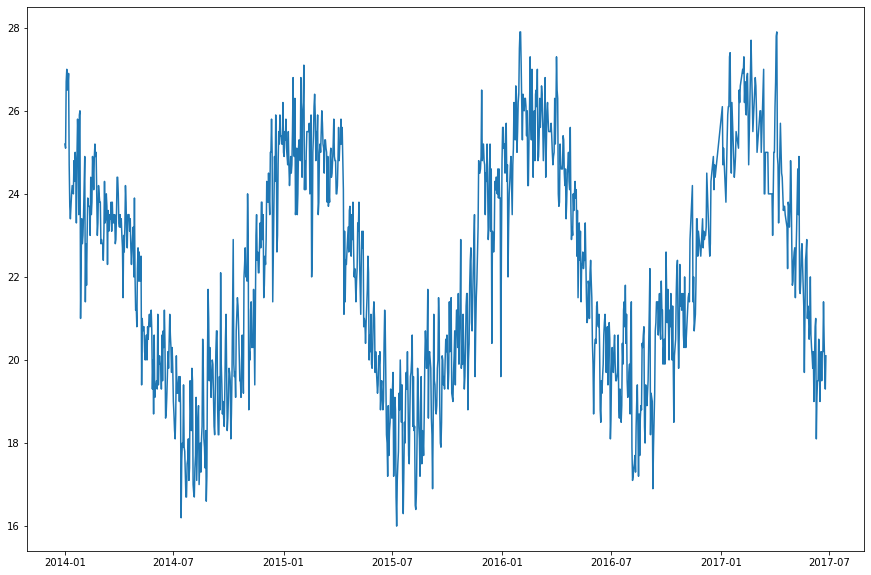

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (15,10))
plt.plot(test_r);

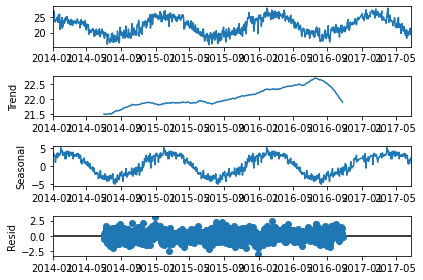

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose
tempmax = seasonal_decompose(test_r, model = 'ad', period = 365)
tempmax.plot()
plt.show();

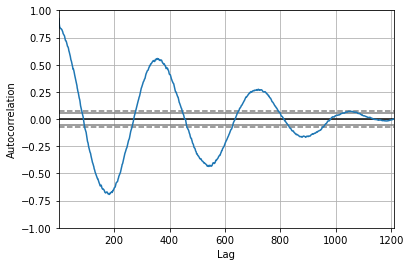

In [98]:
# Nous sommes dans le cas d'un modèle additif, donc pas la peine d'avoir recours à une transformée logarithmique
# Pour visualiser si notre série est sationnaire, on va regarder son diagramme d'autocorrélation:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(test_r);


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

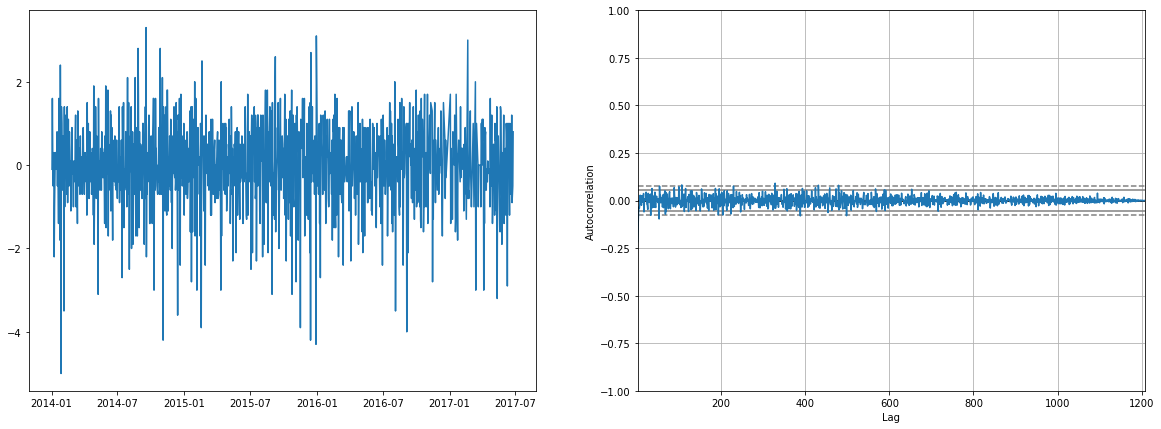

In [99]:
# je différencie la série d'ordre 1
testr_1 = test_r.diff(1).dropna()

plt.figure(figsize = (20,7))

plt.subplot(121)
plt.plot(testr_1)  # Série temporelle différenciée d'ordre 1

plt.subplot(122)
pd.plotting.autocorrelation_plot(testr_1)  # Autocorrélogramme des la série différenciée d'ordre 1 

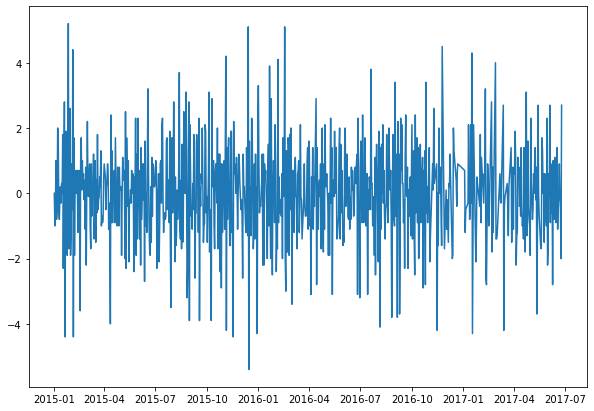

In [100]:
# on constate que la série décroit vers 0, mais lentement, mais présente des pics saisonniers;
# on va essayer de la différencier de manière à éliminer la saisonalité, afin que la décroissance vers zéro, soit plus rapide
# et par conséquent la série plus stationnaire.
testr_s = testr_1.diff(periods = 365).dropna()
plt.figure(figsize = (10,7))
plt.plot(testr_s);

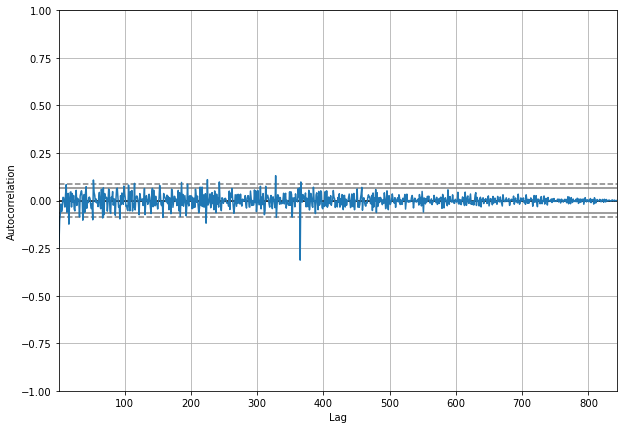

In [101]:
plt.figure(figsize = (10,7))
autocorrelation_plot(testr_s);

In [102]:
# appliquons le test ADF à la série différenciée pour nous assurer qu'elle est devenue stationnaire:
from statsmodels.tsa.stattools import adfuller
adfuller(testr_s)

(-11.357689593794252,
 9.643734858076497e-21,
 16,
 826,
 {'1%': -3.4382915719823934,
  '5%': -2.8650454292904577,
  '10%': -2.568636586835826},
 2814.507664586772)

In [ ]:
# la p_value lue sur le test statistique est de 0.000000 < 5%, donc on peut considérer la série testr_s comme stationnaire.
# Il est donc désormais possible de la modéliser en utilisant un processus ARMA. Le modèle SARIMA prend en compte le terme saisonnier

<Figure size 720x504 with 0 Axes>

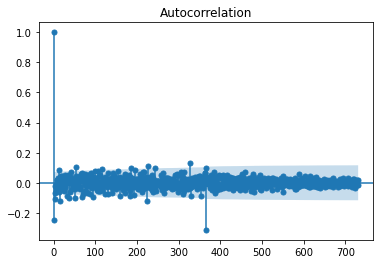

In [104]:
#Pour le modèle SARIMA (p, d, q)(P, D, Q)k, nous avons déjà nos coefficients de différenciation: d = 0 et D = 1,
# car nous n'avons pas fait de différenciation simple (d=0), mais nous avons fait une différenciation saisonnière (D=1),
# et nous avons identifié une période de k = 365
# Pour trouver les coefficients restants de SARIMA, p, q, P et Q, traçons les autocorrélogrammes simples et partiels de la série.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize = (10,7))
plot_acf(testr_s, lags=730);

C:\Users\zeina\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


<Figure size 720x504 with 0 Axes>

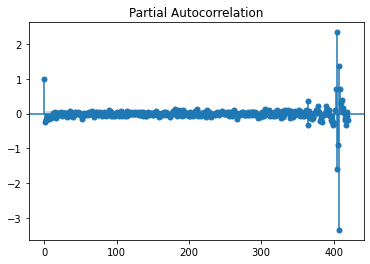

In [108]:
plt.figure(figsize = (10,7))
plot_pacf(testr_s, lags=420);

In [109]:
import statsmodels.api

In [ ]:
m = statsmodels.api.tsa.SARIMAX(testr_s, order = (1,0,1), seasonal_order = (1,1,1,365))
m_ajuste = m.fit()
print(m_ajuste.summary())

C:\Users\zeina\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\zeina\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\zeina\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MemoryError: Unable to allocate 3.37 GiB for an array with shape (732, 732, 844) and data type float64